# Glycerol Interactions 10 ns

## Prepare FM Input Files

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mscg import *

In [2]:
from mscg.cli import cgmap

cgmap.main(map='map.yaml', traj='traj.trr', out='CG.trr')

CG_traj = Trajectory('CG.trr', fmt='trr')
CG_traj.read_frame()
CG_traj.x.shape

# cgmap.main(map='map.yaml', traj='traj.trr', out='CG.lammpstrj')

# CG_traj = Trajectory('CG.lammpstrj', fmt='lammpstrj')
# CG_traj.read_frame()
# CG_traj.x.shape

(3000, 3)

## Check histograms for fitting range

In [4]:
from mscg.cli import cgib

hists = cgib.main(
    top   = "cg.top",
    traj  = "CG.lammpstrj",
    cut   = 15.0,
    pair  = [
        'C,C,min=0.5,max=15.0,bins=100',
        'C,C1,min=0.5,max=15.0,bins=100',
        'C,C2,min=0.5,max=15.0,bins=100',
        'C1,C1,min=0.5,max=15.0,bins=100',
        'C1,C2,min=0.5,max=15.0,bins=100',
        'C2,C2,min=0.5,max=15.0,bins=100'
    ],
    bond  = [
        'C,C1,min=0.5,max=5.0,bins=100',
        'C1,C2,min=0.5,max=5.0,bins=100',
    ],
    angle = ['C,C1,C2,min=45,max=180,bins=100'],
    save  = 'return'
)

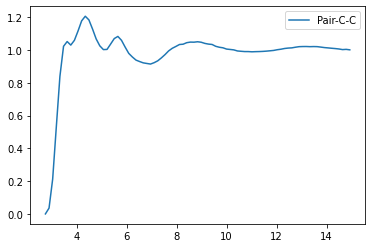

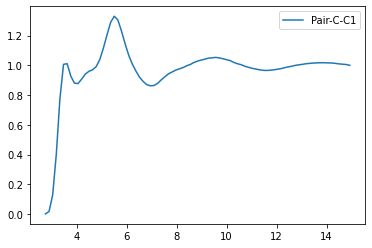

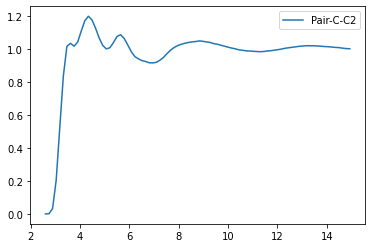

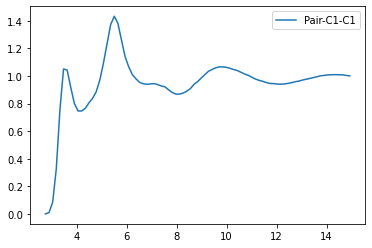

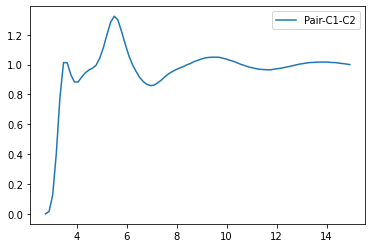

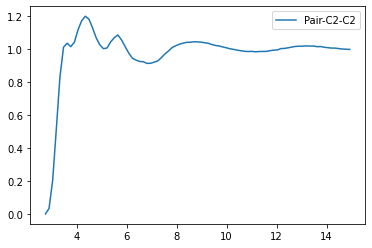

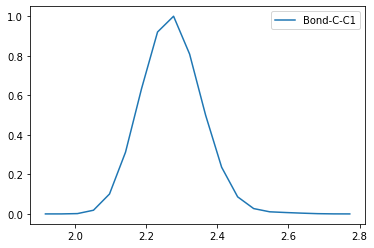

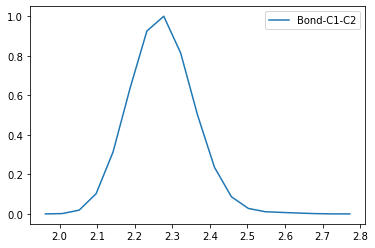

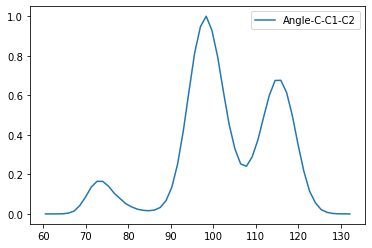

In [6]:
for i in range(len(hists)):
    hist = hists[i]
    data = hist['data']
    fig = plt.figure()
    plt.plot(data[:,0],data[:,1],label=hist['name'])
    plt.legend();

#### Ranges for fitting
<ul> 
    <li> C-C   pair: 4-10      </li>
    <li> C-C1  pair: 4-11      </li>
    <li> C-C2  pair: 4-10      </li>
    <li> C1-C1 pair: 4-11.5    </li>
    <li> C1-C2 pair: 4-11.5    </li>
    <li> C2-C2 pair: 4-10      </li>
    <li> C-C1  bond: 2.05-2.55 </li>
    <li> C1-C2 bond: 2.0-2.6   </li>
    <li>      angle: 65-130    </li>
</ul>

In [9]:
# Convert angles to radians
print(np.pi/180 * 65)
print(np.pi/180 * 130)

1.1344640137963142
2.2689280275926285


## Force-Matching Tabulated Potentials

In [12]:
# Check glycerol - glycerol interactions
from mscg.cli import cgfm

cgfm.main(
    top  = "cg.top",
    traj = "CG.lammpstrj",
    cut  = 15.0,
    pair = [
        'model=BSpline,type=C:C,min=4.0,max=10.0,resolution=0.2,order=6',
        'model=BSpline,type=C:C1,min=4.0,max=11.0,resolution=0.2,order=6',
        'model=BSpline,type=C:C2,min=4.0,max=10.0,resolution=0.2,order=6',
        'model=BSpline,type=C1:C1,min=4.0,max=11.5,resolution=0.2,order=6',
        'model=BSpline,type=C1:C2,min=4.0,max=11.5,resolution=0.2,order=6',
        'model=BSpline,type=C2:C2,min=4.0,max=10.0,resolution=0.2,order=6',
        ],
    bond = [
        'model=BSpline,type=C:C1,min=2.05,max=2.55,resolution=0.01,order=3',
        'model=BSpline,type=C1:C2,min=2.0,max=2.6,resolution=0.01,order=3'
    ],
    angle = [
        'model=BSpline,type=C:C1:C2,min=1.13,max=2.27,resolution=0.1,order=3'
    ]
)

In [2]:
# Without using the histogram ranges
from mscg.cli import cgfm

cgfm.main(
    top  = "cg.top",
    traj = "CG.lammpstrj",
    cut  = 15.0,
    pair = [
        'model=BSpline,type=C:C,min=3.0,max=15.0,resolution=0.2,order=6',
        'model=BSpline,type=C:C1,min=3.0,max=15.0,resolution=0.2,order=6',
        'model=BSpline,type=C:C2,min=3.0,max=15.0,resolution=0.2,order=6',
        'model=BSpline,type=C1:C1,min=3.0,max=15.0,resolution=0.2,order=6',
        'model=BSpline,type=C1:C2,min=3.0,max=15.0,resolution=0.2,order=6',
        'model=BSpline,type=C2:C2,min=3.0,max=15.0,resolution=0.2,order=6',
        ]
)

## Get tabulated data

In [2]:
from mscg.cli import cgdump

pairs = ['C-C','C-C1','C-C2','C1-C1','C1-C2','C2-C2']
bonds = ['C-C1', 'C1-C2']
angles = ['C-C1-C2']
dump_list = ['Pair_' + model + ',0.5,10.0,0.002' for model in pairs]
#dump_list += ['Bond_' + model + ',1.0,5.0,0.05' for model in bonds]
#dump_list += ['Angle_' + model + ',1.0,3.0,0.05' for model in angles]

In [3]:
cgdump.main(
    file = 'result.p',
    dump = dump_list
)

Matrix file loaded: result.p
Generated by: Nate_S (2021-07-29 11:43:51.585641)
Generated on: biot16-198-dhcp.int.colorado.edu (os: linux)
Working path: /home/Nate_S/Projects/mscg/glycerol_reference
The file contains 6 models:
 * Pair_C-C        : min=3.0 max=15.0 resolution=0.2 order=6
 * Pair_C-C1       : min=3.0 max=15.0 resolution=0.2 order=6
 * Pair_C-C2       : min=3.0 max=15.0 resolution=0.2 order=6
 * Pair_C1-C1      : min=3.0 max=15.0 resolution=0.2 order=6
 * Pair_C1-C2      : min=3.0 max=15.0 resolution=0.2 order=6
 * Pair_C2-C2      : min=3.0 max=15.0 resolution=0.2 order=6
Produce table for [Pair_C-C] ...
Produce table for [Pair_C-C1] ...
Produce table for [Pair_C-C2] ...
Produce table for [Pair_C1-C1] ...
Produce table for [Pair_C1-C2] ...
Produce table for [Pair_C2-C2] ...


## Plot tabulated data

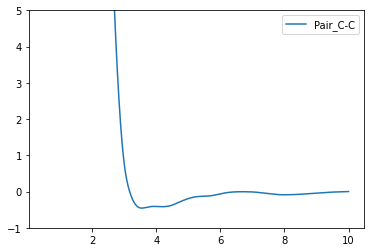

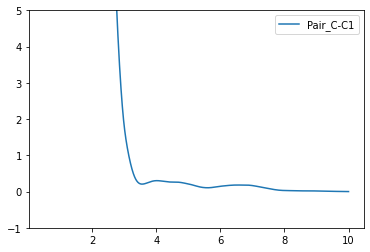

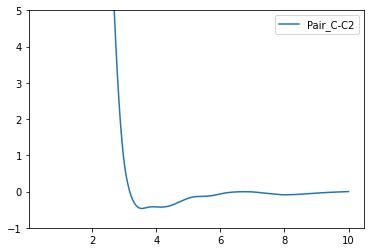

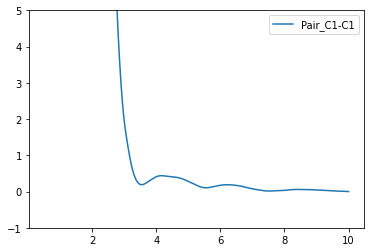

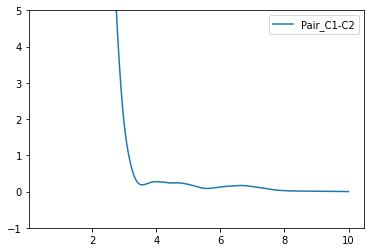

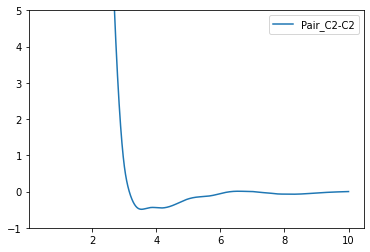

In [5]:
tables = ['Pair_' + model for model in pairs]
#tables += ['Bond_' + model for model in bonds]
#tables += ['Angle_' + model for model in angles]

for tbl in tables:
    
    data = np.loadtxt('./' + tbl + '.table', skiprows=5)
    fig = plt.figure()
    plt.plot(data[:,1], data[:,2], label=tbl)
    plt.ylim([-1,5])
    plt.legend();
    

# plt.ylim([-1,5])
# plt.xlim([0,10]);

In [8]:
data[:,1]

array([ 0.5  ,  0.502,  0.504, ...,  9.996,  9.998, 10.   ])